LOAD DATA

In [1]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
#Load Dataset
dataset = pd.read_csv('./iris.csv')
dataset.head()

sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

In [4]:
#Create X and y Variable
X = dataset.drop('species', axis = 1).values
y = dataset['species'].values

In [5]:
#Scale X Variables
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_2 = sc.fit_transform(X)

In [7]:
#Prepare for Model
#Load Library for Training
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, stratify = y, random_state = 100)

In [8]:
#Import Model
from sklearn.ensemble import RandomForestClassifier

CREATE PIPELINES

In [9]:
#Construct some pipelines
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

pipe_rf = Pipeline ([('scl', StandardScaler()),
                    ('clf', RandomForestClassifier(random_state=100))])

LEARNING CURVE

C:\Users\iknow\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\iknow\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\iknow\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\iknow\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\iknow\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: F

C:\Users\iknow\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\iknow\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\iknow\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\iknow\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\iknow\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: F

C:\Users\iknow\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\iknow\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\iknow\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\iknow\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\iknow\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: F

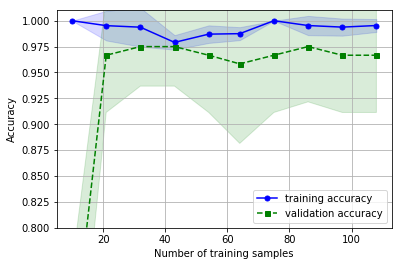

In [11]:
#Define Plot for Learning Curve
from sklearn.model_selection import learning_curve

def plot_learning_curves(model):
    train_sizes, train_scores, test_scores = learning_curve(estimator=model,
                                                           X=X_train,
                                                           y=y_train,
                                                           cv=10,
                                                           train_sizes = np.linspace(.1,1,10),
                                                           scoring='accuracy',
                                                           n_jobs=1)
    train_mean = np.mean(train_scores, axis = 1)
    train_std = np.std(train_scores, axis = 1)
    test_mean = np.mean(test_scores, axis = 1)
    test_std = np.std(test_scores, axis = 1)
    
    plt.plot(train_sizes, train_mean, color = 'blue', marker = 'o', markersize = 5, label = 'training accuracy')
    plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha = 0.15, color = 'blue')
    
    plt.plot(train_sizes, test_mean, color = 'green', linestyle = '--', marker = 's', markersize = 5, label = 'validation accuracy')
    plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha = 0.15, color = 'green')
    
    plt.grid()
    plt.xlabel('Number of training samples')
    plt.ylabel('Accuracy')
    plt.legend(loc='lower right')
    plt.ylim([0.8,1.01])
    plt.show()
    
#Plot Learning Curve
plot_learning_curves(pipe_rf)

GRIDSEARCH CV

In [12]:
#Create Table to compare MLA metrics

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
pd.set_option('display.max_colwidth', -1)

In [14]:
#Set Gridsearch Params
param_gridrf = {'clf__n_estimators': [100,150,200],
                'clf__max_features': ['auto', 'log2', 'sqrt'],
                'clf__bootstrap': [True, False]}

#Optimize Model
cv2 = RepeatedKFold(n_splits=10, n_repeats = 5, random_state=100)
opt_rf = GridSearchCV(estimator=pipe_rf, param_grid=param_gridrf,
                      cv = cv2, verbose = 0, scoring = 'accuracy', n_jobs = -1)

#List of pipelines for ease of iteration
grids = [opt_rf]

#Dictionary of Pipelines and Classifier Types for Ease of Reference
grid_dict = {0:'rf'}

In [15]:
#Create Dataframe for MLA Analysis
MLA_columns = []
MLA_compare = pd.DataFrame(columns = MLA_columns)

row_index = 0
for idx, gs in enumerate(grids):
    
    #Fit Grid Search
    gs.fit(X_train, y_train)
    
    #Nested CV
    scoresNestedPre = cross_val_score(gs, X_2, y, scoring = 'precision_weighted', cv = 5, n_jobs = -1)
    scoresNestedRec = cross_val_score(gs, X_2, y, scoring = 'recall_weighted', cv = 5, n_jobs = -1)
    
    #Create Dataframe to Compare Models
    MLA_compare.loc[row_index, 'Algorithm Name'] = grid_dict[idx]
    MLA_compare.loc[row_index, 'Train Accuracy'] = round(gs.best_score_, 2)
    MLA_compare.loc[row_index, 'Precision-NestedCV'] = str('{:0.2f} +/- {:0.2f}'.format(np.mean(scoresNestedPre),
                                                                                       np.std(scoresNestedPre)))
    MLA_compare.loc[row_index, 'Recall-NestedCV'] = str('{:0.2f} +/- {:0.2f}'.format(np.mean(scoresNestedRec),
                                                                                       np.std(scoresNestedRec)))

MLA_compare.sort_values(by = ['Precision-NestedCV'], ascending = False, inplace = True)
MLA_compare
    

Algorithm Name  Train Accuracy Precision-NestedCV Recall-NestedCV
0  rf             0.96            0.96 +/- 0.03      0.96 +/- 0.03

FEATURE SELECTION

In [16]:
#Feature Importance - Optimized
for name, score in zip(list(dataset), opt_rf.best_estimator_.named_steps['clf'].feature_importances_):
    print(name, round(score,2))

sepal_length 0.1
sepal_width 0.02
petal_length 0.41
petal_width 0.47
